In [19]:
import json
import shutil
from pathlib import Path 

import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
from tqdm.auto import tqdm

In [2]:
prediction_df = pd.read_csv('./data/predictions.csv', index_col=0)
prediction_df.head()

,imdb_id,frame_num,face_num,x1,y1,x2,y2,img_height,img_width,area,pct_of_frame,season,episode,encoding,filename,character,cast_id,class,confidence
0,1811020,192,0,798,196,916,314,1080,1920,13924,0.007,1,1,"[-0.1581144630908966, 0.11875572055578232, 0.0...",NaN,NaN,NaN,Carrie Mathison,0.038
1,1811020,192,0,798,196,916,314,1080,1920,13924,0.007,1,1,"[-0.1581144630908966, 0.11875572055578232, 0.0...",NaN,NaN,NaN,David Estes,0.000
2,1811020,192,0,798,196,916,314,1080,1920,13924,0.007,1,1,"[-0.1581144630908966, 0.11875572055578232, 0.0...",NaN,NaN,NaN,Saul Berenson,0.294
3,1811020,192,0,798,196,916,314,1080,1920,13924,0.007,1,1,"[-0.1581144630908966, 0.11875572055578232, 0.0...",NaN,NaN,NaN,Nicholas Brody,0.000
4,1811020,192,0,798,196,916,314,1080,1920,13924,0.007,1,1,"[-0.1581144630908966, 0.11875572055578232, 0.0...",NaN,NaN,NaN,Jessica Brody,0.000


In [57]:
top = df[['season',
               'episode',
               'frame_num',
               'face_num',
               'pct_of_frame',
               'confidence',
               'character']].groupby(['season', 'episode', 'frame_num', 'face_num']).max()
top.head()

pct_of_frame  confidence  character
season episode frame_num face_num                                     
1      1       192       0                0.007       0.318        NaN
               216       0                0.086       0.995        NaN
                         1                0.042       0.415        NaN
               240       0                0.042       0.981        NaN
                         1                0.042       0.973        NaN

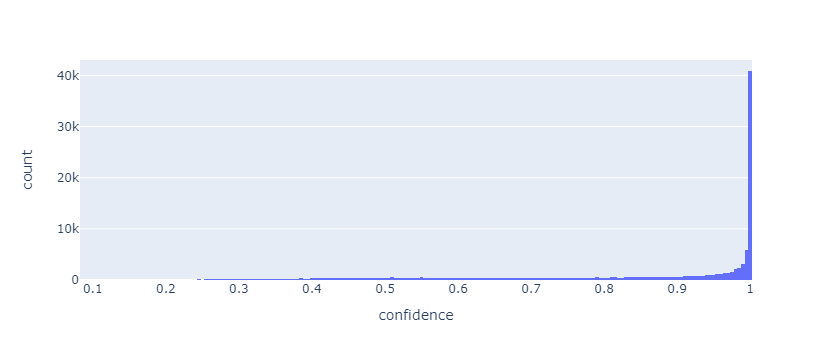

In [58]:
fig = px.histogram(top, x='confidence')
fig.show()

In [3]:
df = prediction_df[prediction_df['confidence'] >= 0.8]
print(prediction_df.shape)
print(df.shape)

(8466093, 19)
(81182, 19)


In [4]:
episode_df = pd.read_csv('./data/episodes.csv', index_col=0)
episode_df.head()

,imdb_id,title,year,season,episode,cast
0,4023224,There's Something Else Going On,2014,4,9,"0000132,1670029,2258164,0732309,0504832,000159..."
1,7126670,Prisoners of War,2020,8,12,"0000132,2687923,0730070,1909661,0001597,036295..."
2,3984158,13 Hours in Islamabad,2014,4,10,"0000132,1670029,2258164,0732309,0504832,000159..."
3,2408794,The Choice,2012,2,12,"0000132,0507073,1072555,0362873,1459109,079217..."
4,2916316,Big Man in Tehran,2013,3,11,"0000132,0507073,1670029,1072555,2093138,283832..."


In [5]:
total_df = df.merge(episode_df[['season', 'episode', 'cast']],
                   on=['season', 'episode'],
                   how='left')
total_df.head()

,imdb_id,frame_num,face_num,x1,y1,x2,y2,img_height,img_width,area,pct_of_frame,season,episode,encoding,filename,character,cast_id,class,confidence,cast
0,1811020,216,0,1068,389,1491,812,1080,1920,178929,0.086,1,1,"[-0.035924218595027924, 0.09460100531578064, 0...",NaN,NaN,NaN,Dar Adal,0.995,"0000132,0507073,1072555,0362873,1459109,209313..."
1,1811020,240,0,1090,106,1384,400,1080,1920,86436,0.042,1,1,"[-0.18763160705566406, 0.08110883831977844, 0....",NaN,NaN,NaN,Aasar Khan,0.981,"0000132,0507073,1072555,0362873,1459109,209313..."
2,1811020,240,1,674,522,968,816,1080,1920,86436,0.042,1,1,"[-0.11751651763916016, 0.1057925745844841, 0.0...",NaN,NaN,NaN,Dar Adal,0.973,"0000132,0507073,1072555,0362873,1459109,209313..."
3,1811020,264,0,1134,237,1232,336,1080,1920,9702,0.005,1,1,"[-0.08124437928199768, 0.14061403274536133, 0....",NaN,NaN,NaN,Paksima,0.853,"0000132,0507073,1072555,0362873,1459109,209313..."
4,1811020,720,0,1185,1017,1224,1057,1080,1920,1560,0.001,1,1,"[-0.17072543501853943, 0.11018028855323792, 0....",NaN,NaN,NaN,President Ben Hayes,0.973,"0000132,0507073,1072555,0362873,1459109,209313..."


In [6]:
with open('./data/cast.json', 'r') as f:
    cast = json.load(f)
cast_df = pd.DataFrame([{'class': k, 'cast_id': v} for k, v in cast.items()])
cast_df.head()

,class,cast_id
0,Carrie Mathison,0000132
1,Saul Berenson,0001597
2,Peter Quinn,1670029
3,Max Piotrowski,0827561
4,Dar Adal,0000719


In [7]:
total_df = total_df.merge(cast_df,
                          on=['class'],
                          how='left')
total_df.head()

,imdb_id,frame_num,face_num,x1,y1,x2,y2,img_height,img_width,area,...,season,episode,encoding,filename,character,cast_id_x,class,confidence,cast,cast_id_y
0,1811020,216,0,1068,389,1491,812,1080,1920,178929,...,1,1,"[-0.035924218595027924, 0.09460100531578064, 0...",NaN,NaN,NaN,Dar Adal,0.995,"0000132,0507073,1072555,0362873,1459109,209313...",0000719
1,1811020,240,0,1090,106,1384,400,1080,1920,86436,...,1,1,"[-0.18763160705566406, 0.08110883831977844, 0....",NaN,NaN,NaN,Aasar Khan,0.981,"0000132,0507073,1072555,0362873,1459109,209313...",1203005
2,1811020,240,1,674,522,968,816,1080,1920,86436,...,1,1,"[-0.11751651763916016, 0.1057925745844841, 0.0...",NaN,NaN,NaN,Dar Adal,0.973,"0000132,0507073,1072555,0362873,1459109,209313...",0000719
3,1811020,264,0,1134,237,1232,336,1080,1920,9702,...,1,1,"[-0.08124437928199768, 0.14061403274536133, 0....",NaN,NaN,NaN,Paksima,0.853,"0000132,0507073,1072555,0362873,1459109,209313...",NaN
4,1811020,720,0,1185,1017,1224,1057,1080,1920,1560,...,1,1,"[-0.17072543501853943, 0.11018028855323792, 0....",NaN,NaN,NaN,President Ben Hayes,0.973,"0000132,0507073,1072555,0362873,1459109,209313...",0870794


In [9]:
total_df['possible'] = total_df.apply(lambda x: True if x['cast_id_y'] in x['cast'].split(',') else False, axis=1)
total_df.head()

,imdb_id,frame_num,face_num,x1,y1,x2,y2,img_height,img_width,area,...,episode,encoding,filename,character,cast_id_x,class,confidence,cast,cast_id_y,possible
0,1811020,216,0,1068,389,1491,812,1080,1920,178929,...,1,"[-0.035924218595027924, 0.09460100531578064, 0...",NaN,NaN,NaN,Dar Adal,0.995,"0000132,0507073,1072555,0362873,1459109,209313...",0000719,False
1,1811020,240,0,1090,106,1384,400,1080,1920,86436,...,1,"[-0.18763160705566406, 0.08110883831977844, 0....",NaN,NaN,NaN,Aasar Khan,0.981,"0000132,0507073,1072555,0362873,1459109,209313...",1203005,False
2,1811020,240,1,674,522,968,816,1080,1920,86436,...,1,"[-0.11751651763916016, 0.1057925745844841, 0.0...",NaN,NaN,NaN,Dar Adal,0.973,"0000132,0507073,1072555,0362873,1459109,209313...",0000719,False
3,1811020,264,0,1134,237,1232,336,1080,1920,9702,...,1,"[-0.08124437928199768, 0.14061403274536133, 0....",NaN,NaN,NaN,Paksima,0.853,"0000132,0507073,1072555,0362873,1459109,209313...",NaN,False
4,1811020,720,0,1185,1017,1224,1057,1080,1920,1560,...,1,"[-0.17072543501853943, 0.11018028855323792, 0....",NaN,NaN,NaN,President Ben Hayes,0.973,"0000132,0507073,1072555,0362873,1459109,209313...",0870794,False


In [10]:
print(total_df.shape)
possible = total_df[total_df['possible'] == True]
print(possible.shape)

(81182, 22)
(52246, 22)


In [11]:
possible.head()

,imdb_id,frame_num,face_num,x1,y1,x2,y2,img_height,img_width,area,...,episode,encoding,filename,character,cast_id_x,class,confidence,cast,cast_id_y,possible
10,1811020,1992,0,1304,341,1446,482,1080,1920,20022,...,1,"[-0.08618786931037903, 0.0924396887421608, 0.0...",NaN,NaN,NaN,Carrie Mathison,0.925,"0000132,0507073,1072555,0362873,1459109,209313...",0000132,True
14,1811020,2496,0,965,303,1083,421,1080,1920,13924,...,1,"[-0.11161063611507416, 0.06708238273859024, 0....",NaN,NaN,NaN,Carrie Mathison,1.000,"0000132,0507073,1072555,0362873,1459109,209313...",0000132,True
16,1811020,2544,1,1277,57,1521,302,1080,1920,59780,...,1,"[-0.12097642570734024, 0.1157357394695282, 0.1...",NaN,NaN,NaN,Saul Berenson,0.998,"0000132,0507073,1072555,0362873,1459109,209313...",0001597,True
18,1811020,2592,0,1146,95,1316,265,1080,1920,28900,...,1,"[-0.08894838392734528, 0.05359116941690445, 0....",NaN,NaN,NaN,David Estes,0.908,"0000132,0507073,1072555,0362873,1459109,209313...",0362873,True
20,1811020,2688,0,1260,140,1463,344,1080,1920,41412,...,1,"[-0.11290141940116882, 0.07638399302959442, 0....",NaN,NaN,NaN,Saul Berenson,1.000,"0000132,0507073,1072555,0362873,1459109,209313...",0001597,True


In [12]:
def format_name(row):
    season = str(row['season'])
    episode = str(row['episode'])
    frame_num = str(row['frame_num'])
    face_num = str(row['face_num'])
    name = f'S{season.zfill(2)}E{episode.zfill(2)}_{frame_num}_{face_num}.png'
    fp = Path('./data/images/').joinpath(name)
    return fp    

In [15]:
possible['filename'] = possible.apply(format_name, axis=1)
possible.head()

,imdb_id,frame_num,face_num,x1,y1,x2,y2,img_height,img_width,area,...,episode,encoding,filename,character,cast_id_x,class,confidence,cast,cast_id_y,possible
10,1811020,1992,0,1304,341,1446,482,1080,1920,20022,...,1,"[-0.08618786931037903, 0.0924396887421608, 0.0...",data/images/S01E01_1992_0.png,NaN,NaN,Carrie Mathison,0.925,"0000132,0507073,1072555,0362873,1459109,209313...",0000132,True
14,1811020,2496,0,965,303,1083,421,1080,1920,13924,...,1,"[-0.11161063611507416, 0.06708238273859024, 0....",data/images/S01E01_2496_0.png,NaN,NaN,Carrie Mathison,1.000,"0000132,0507073,1072555,0362873,1459109,209313...",0000132,True
16,1811020,2544,1,1277,57,1521,302,1080,1920,59780,...,1,"[-0.12097642570734024, 0.1157357394695282, 0.1...",data/images/S01E01_2544_1.png,NaN,NaN,Saul Berenson,0.998,"0000132,0507073,1072555,0362873,1459109,209313...",0001597,True
18,1811020,2592,0,1146,95,1316,265,1080,1920,28900,...,1,"[-0.08894838392734528, 0.05359116941690445, 0....",data/images/S01E01_2592_0.png,NaN,NaN,David Estes,0.908,"0000132,0507073,1072555,0362873,1459109,209313...",0362873,True
20,1811020,2688,0,1260,140,1463,344,1080,1920,41412,...,1,"[-0.11290141940116882, 0.07638399302959442, 0....",data/images/S01E01_2688_0.png,NaN,NaN,Saul Berenson,1.000,"0000132,0507073,1072555,0362873,1459109,209313...",0001597,True


In [20]:
def save_images(row):
    dst = Path(f'./data/predictions/{row["class"]}')
    if not dst.exists():
        Path.mkdir(dst, parents=True)
    fp = dst.joinpath(Path(row['filename']).name)
    shutil.copy(Path(row['filename']).absolute(), fp)

In [22]:
tqdm().pandas()
possible.progress_apply(save_images, axis=1)

0it [00:00, ?it/s]

  0%|          | 0/52246 [00:00<?, ?it/s]

10       None
14       None
16       None
18       None
20       None
         ... 
81172    None
81173    None
81174    None
81175    None
81180    None
Length: 52246, dtype: object